# Data Preprocessing 
In order to build a sufficient model which should predict the life expectancy for certain countries we first need to extract data which helps us to make the predictions. The first part includes a Data exploration on different indicators which migth influence the life expectancy and a evaluation of the correlation between the parameters and life-expectancies. 
____
What we don't want to look into are Features which are directly related to the life-expectancy like Features related to deaths (e.g. adult mortality, under-five deaths etc.)
____

The second part includes the data cleaning of explored Features.  



In [24]:
import pandas as pd
sys.path.append('../')
from utils import get_data
import matplotlib.pyplot as plt
import wbgapi as wb
import time
import concurrent.futures
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA


## Exploratory

In [25]:
# define the indicator and country
countries = ['ind', 'npl', 'chn', 'us', 'sdn', 'de']

# run the get_data function
data_life_exp = get_data('SP.DYN.LE00.IN', countries)

In [26]:
# test to gather features 
data_unemployment_rate = get_data('SL.UEM.TOTL.NE.ZS', countries)

data_armed_forces = get_data('MS.MIL.TOTL.P1', countries)


In [27]:
# search for indicators
wb.search('rural population')

ID,Name,Field,Value
AG.LND.EL5M.RU.K2,,Source,"...- City University of New York. 2021. Low Elevation Coastal Zone (LECZ) Urban-Rural Population and Land Area Estimates, Version 3. Palisades, NY: NASA Socioeconomic Data and..."
AG.LND.EL5M.RU.ZS,,Source,"...- City University of New York. 2021. Low Elevation Coastal Zone (LECZ) Urban-Rural Population and Land Area Estimates, Version 3. Palisades, NY: NASA Socioeconomic Data and..."
AG.LND.EL5M.UR.K2,,Source,"...- City University of New York. 2021. Low Elevation Coastal Zone (LECZ) Urban-Rural Population and Land Area Estimates, Version 3. Palisades, NY: NASA Socioeconomic Data and..."
AG.LND.EL5M.UR.ZS,,Source,"...- City University of New York. 2021. Low Elevation Coastal Zone (LECZ) Urban-Rural Population and Land Area Estimates, Version 3. Palisades, NY: NASA Socioeconomic Data and..."
AG.LND.EL5M.ZS,,Source,"...- City University of New York. 2021. Low Elevation Coastal Zone (LECZ) Urban-Rural Population and Land Area Estimates, Version 3. Palisades, NY: NASA Socioeconomic Data and..."
AG.LND.TOTL.RU.K2,,Source,"...Earth Science Information Network (CIESIN)/Columbia University. 2013. Urban-Rural Population and Land Area Estimates Version 2. Palisades, NY: NASA Socioeconomic Data and..."
AG.LND.TOTL.UR.K2,,Source,"...Earth Science Information Network (CIESIN)/Columbia University. 2013. Urban-Rural Population and Land Area Estimates Version 2. Palisades, NY: NASA Socioeconomic Data and..."
EG.CFT.ACCS.RU.ZS,,IndicatorName,"Access to clean fuels and technologies for cooking, rural (% of rural population)"
EG.CFT.ACCS.RU.ZS,,Longdefinition,"...Access to clean fuels and technologies for cooking, rural is the proportion of rural population primarily using clean cooking fuels and technologies for cooking. Under WHO..."
EG.ELC.ACCS.RU.ZS,,IndicatorName,"Access to electricity, rural (% of rural population)"


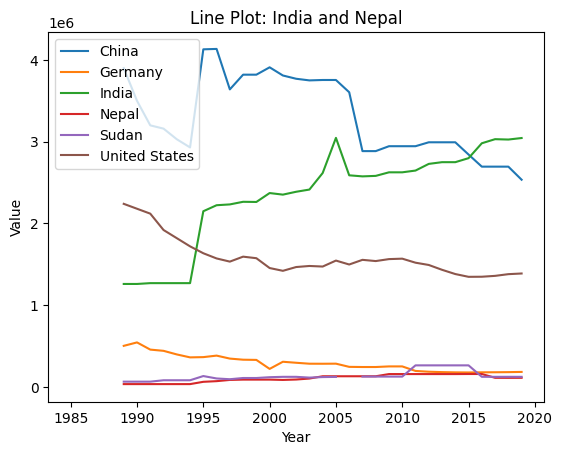

In [28]:
# Create a lineplot
df_filled = data_armed_forces.pivot(index='Date', columns='Country', values='Value')

df_filled.plot.line()
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Line Plot: India and Nepal')
plt.legend()
plt.show()

In [29]:
data_life_exp

,Country,Date,Value
0,India,2022,NaN
1,India,2021,67.240000
2,India,2020,70.150000
3,India,2019,70.910000
4,India,2018,70.710000
...,...,...,...
295,Germany,1977,72.307317
296,Germany,1976,71.712220
297,Germany,1975,71.259244
298,Germany,1974,71.418927


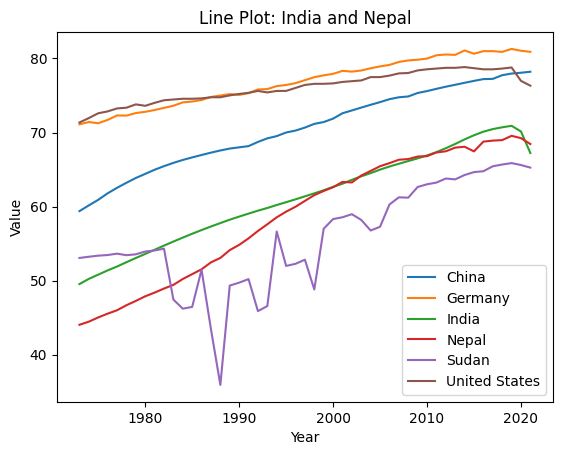

In [30]:
# Create a lineplot
df_filled = data_life_exp.pivot(index='Date', columns='Country', values='Value')

df_filled.plot.line()
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Line Plot: India and Nepal')
plt.legend()
plt.show()

# Get data of all countries

In [31]:
# 
country_data = wb.economy.DataFrame()

In [32]:
country_ids = country_data.index.to_list()

In [33]:
country_ids

['ABW',
 'AFE',
 'AFG',
 'AFW',
 'AGO',
 'ALB',
 'AND',
 'ARB',
 'ARE',
 'ARG',
 'ARM',
 'ASM',
 'ATG',
 'AUS',
 'AUT',
 'AZE',
 'BDI',
 'BEL',
 'BEN',
 'BFA',
 'BGD',
 'BGR',
 'BHR',
 'BHS',
 'BIH',
 'BLR',
 'BLZ',
 'BMU',
 'BOL',
 'BRA',
 'BRB',
 'BRN',
 'BTN',
 'BWA',
 'CAF',
 'CAN',
 'CEB',
 'CHE',
 'CHI',
 'CHL',
 'CHN',
 'CIV',
 'CMR',
 'COD',
 'COG',
 'COL',
 'COM',
 'CPV',
 'CRI',
 'CSS',
 'CUB',
 'CUW',
 'CYM',
 'CYP',
 'CZE',
 'DEU',
 'DJI',
 'DMA',
 'DNK',
 'DOM',
 'DZA',
 'EAP',
 'EAR',
 'EAS',
 'ECA',
 'ECS',
 'ECU',
 'EGY',
 'EMU',
 'ERI',
 'ESP',
 'EST',
 'ETH',
 'EUU',
 'FCS',
 'FIN',
 'FJI',
 'FRA',
 'FRO',
 'FSM',
 'GAB',
 'GBR',
 'GEO',
 'GHA',
 'GIB',
 'GIN',
 'GMB',
 'GNB',
 'GNQ',
 'GRC',
 'GRD',
 'GRL',
 'GTM',
 'GUM',
 'GUY',
 'HIC',
 'HKG',
 'HND',
 'HPC',
 'HRV',
 'HTI',
 'HUN',
 'IBD',
 'IBT',
 'IDA',
 'IDB',
 'IDN',
 'IDX',
 'IMN',
 'IND',
 'INX',
 'IRL',
 'IRN',
 'IRQ',
 'ISL',
 'ISR',
 'ITA',
 'JAM',
 'JOR',
 'JPN',
 'KAZ',
 'KEN',
 'KGZ',
 'KHM',
 'KIR',


## Gather relevant Features and create a Dataframe

In [34]:
# define columns to join on 
join_columns = ['Country', 'Date']

# get life expectency as starting df
df = get_data('SP.DYN.LE00.IN', country_ids)
df.rename(columns={'Value': 'life_exp'}, inplace=True)

# get the year and country structure to later on merge all features to this structure
result_df = df.drop('life_exp', axis=1)


In [35]:
# because this could take very long we want to measure the time 
start_time = time.time()


# Define a function to retrieve data for a given indicator and merge it into the DataFrame
def get_and_merge_data(indicator, column_name):
    data = get_data(indicator, country_ids)
    data.rename(columns={'Value': column_name}, inplace=True)
    return pd.merge(result_df, data, on=join_columns, how='left')

# Define the indicators and column names
indicators = [
    ('SP.DYN.LE00.IN', 'life_exp'),
    ('EG.ELC.ACCS.RU.ZS', 'access_to_electricity'),
    ('BG.GSR.NFSV.GD.ZS', 'trade_in_services'),
    ('BM.KLT.DINV.WD.GD.ZS', 'foreign_investm'),
    ('CM.MKT.TRAD.GD.ZS', 'stocks_traded'),
    ('CM.MKT.LCAP.GD.ZS', 'companies_marketcap'),
    ('EG.GDP.PUSE.KO.PP.KD', 'gdp_per_energy_use'),
    ('SH.ALC.PCAP.LI', 'alcohol_consumption'),
    ('SH.STA.OWAD.MA.ZS', 'perc_overweigth'),
    ('SH.IMM.IBCG', 'child_immunization'),
    ('NY.GDP.PCAP.CD', 'gdp_per_cap'),
    ('NY.GSR.NFCY.CD', 'net_primary_income'),
    ('SP.RUR.TOTL.ZS', 'rural_population'),
    ('SH.STA.SMSS.ZS', 'save_sanitation'),
    ('SE.PRM.CMPT.ZS', 'primary_school_completion'),
    ('SL.UEM.TOTL.NE.ZS', 'unemployment_rate'),
    ('MS.MIL.TOTL.P1', 'armed_forces'),
    ('SH.IMM.MEAS', 'measels_immunitization')
]

# Create a ThreadPoolExecutor with the maximum number of workers
with concurrent.futures.ThreadPoolExecutor() as executor:
    # Submit the tasks for each indicator and retrieve the results
    futures = [executor.submit(get_and_merge_data, indicator, column_name) for indicator, column_name in indicators]
    # Wait for all tasks to complete
    concurrent.futures.wait(futures)

# Combine the results from all tasks into the final DataFrame
for future in futures:
    data = future.result()
    result_df = pd.merge(result_df, data, on=join_columns, how='left')

# time measuring 
end_time = time.time()
elapsed_time = end_time - start_time

print("Elapsed time:", elapsed_time, "seconds")


Elapsed time: 261.90788197517395 seconds


The time with parallel processing was 5 times faster 

In [36]:
#df.to_csv('/Users/kevingiesen/Library/Mobile Documents/com~apple~CloudDocs/BIPM Master/Semester 2/Big Data/Big Data Project/app/predicition model/data/data_raw_v2.csv', index=False)

In [37]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13300 entries, 0 to 13299
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Country                    13300 non-null  object
 1   Date                       13300 non-null  int64 
 2   life_exp                   12581 non-null  object
 3   access_to_electricity      6721 non-null   object
 4   trade_in_services          8941 non-null   object
 5   foreign_investm            9133 non-null   object
 6   stocks_traded              3584 non-null   object
 7   companies_marketcap        3215 non-null   object
 8   gdp_per_energy_use         4469 non-null   object
 9   alcohol_consumption        1164 non-null   object
 10  perc_overweigth            9744 non-null   object
 11  child_immunization         7597 non-null   object
 12  gdp_per_cap                11183 non-null  object
 13  net_primary_income         8028 non-null   object
 14  rural_

In [38]:
# delete the columns wiht too many Nulls
result_df = result_df.drop(['stocks_traded', 'companies_marketcap', 'gdp_per_energy_use', 'alcohol_consumption', 'save_sanitation', 'unemployment_rate'], axis=1)


# Filling NA's with Linear regression for each country
In order to fill out the NA's for each column and country we performed a Linear Regression to all the data as a filling strategy. 
If the column is not really filled at all (more than 25 Nulls) we won't fit a Linear Regression in order to fill the nulls. 

Now we know that we could have used 
df.interpolate(method='linear', inplace=True)
but the self writting code gives us more control.

In [39]:
# create a new Datframe where the results are stored
df_no_nulls = pd.DataFrame()

# loop over all countrys in the dataframe
for country in result_df['Country'].unique():

    country_data = result_df[result_df["Country"] == country]

    # loop over all columns in a dataframe 
    for column in country_data.columns:
        
        # ignore Country, Date and life_exp column
        if column == 'Country' or column == 'Date' or column == 'life_exp':
            continue

        # Count the null values for each column
        null_counts = country_data[column].isnull().sum()
        total_counts = country_data[column].sum()
        per_of_nas = null_counts/total_counts

        # if the percentage of nulls is less then 30% perform a linear regression
        if per_of_nas <= 0.3 and null_counts >= 1:
            # Split your data into two parts: one with missing values and one without
            df_missing = country_data[country_data[column].isnull()]
            df_complete = country_data[~country_data[column].isnull()]

            # Create X and y for the complete data
            X = df_complete['Date'].values.reshape(-1, 1)
            y = df_complete[column].values

            # Create a linear regression model and fit it
            model = LinearRegression()
            model.fit(X, y)

            # Predict the missing values using the fitted model
            df_missing[column] = model.predict(df_missing['Date'].values.reshape(-1, 1))

            if column == 'net_primary_income' or column == 'foreign_investm':
                pass
            else:
                df_missing[column] = df_missing[column].apply(lambda x: x if x >= 0 else 0)


            # Print the null value counts for each column
            country_data.update(df_missing)
    
    df_no_nulls = pd.concat([df_no_nulls, country_data], ignore_index=True)


/var/folders/cx/n48bpdt164v8z8lqdrk84fmw0000gn/T/ipykernel_25373/119044332.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing[column] = model.predict(df_missing['Date'].values.reshape(-1, 1))
/var/folders/cx/n48bpdt164v8z8lqdrk84fmw0000gn/T/ipykernel_25373/119044332.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing[column] = df_missing[column].apply(lambda x: x if x >= 0 else 0)
/var/folders/cx/n48bpdt164v8z8lqdrk84fmw0000gn/T/ipykernel_25373/119044332.py:36: SettingWithCopyWarnin

In [40]:
df_no_nulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13300 entries, 0 to 13299
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Country                    13300 non-null  object
 1   Date                       13300 non-null  int64 
 2   life_exp                   12581 non-null  object
 3   access_to_electricity      12557 non-null  object
 4   trade_in_services          12264 non-null  object
 5   foreign_investm            10011 non-null  object
 6   perc_overweigth            11600 non-null  object
 7   child_immunization         10150 non-null  object
 8   gdp_per_cap                13100 non-null  object
 9   net_primary_income         10306 non-null  object
 10  rural_population           13143 non-null  object
 11  primary_school_completion  12155 non-null  object
 12  armed_forces               11050 non-null  object
 13  measels_immunitization     12050 non-null  object
dtypes: int

In [41]:
# fill nulls with forward fill
df_no_nulls.fillna(method='ffill', inplace=True)

df_no_nulls.dropna(inplace=True)

In [42]:
df_no_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13250 entries, 50 to 13299
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    13250 non-null  object 
 1   Date                       13250 non-null  int64  
 2   life_exp                   13250 non-null  float64
 3   access_to_electricity      13250 non-null  float64
 4   trade_in_services          13250 non-null  float64
 5   foreign_investm            13250 non-null  float64
 6   perc_overweigth            13250 non-null  float64
 7   child_immunization         13250 non-null  float64
 8   gdp_per_cap                13250 non-null  float64
 9   net_primary_income         13250 non-null  float64
 10  rural_population           13250 non-null  float64
 11  primary_school_completion  13250 non-null  float64
 12  armed_forces               13250 non-null  float64
 13  measels_immunitization     13250 non-null  float64

In [46]:
df_no_nulls.to_csv('/Users/kevingiesen/Library/Mobile Documents/com~apple~CloudDocs/BIPM Master/Semester 2/Big Data/Big Data Project 3/SS23-BIPM-Big-Data-Group-KMJ-Do-Gooders/app/predicition model/data/data_no_nas.csv', index=False)

In [47]:
# store 2021 data for each country as default value
df_country_indicators = df_no_nulls[(df_no_nulls["Date"] == 2020)]
df_country_indicators = df_country_indicators.reset_index()

df_country_indicators = df_country_indicators.drop('index', axis=1)


In [48]:
df_country_indicators.to_csv('/Users/kevingiesen/Library/Mobile Documents/com~apple~CloudDocs/BIPM Master/Semester 2/Big Data/Big Data Project 3/SS23-BIPM-Big-Data-Group-KMJ-Do-Gooders/app/predicition model/data/default-data.csv', index=False)